<a href="https://colab.research.google.com/github/LalithaJanneti/Decision-Tree/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pydotplus
from IPython.display import Image
import shap

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_prediction.csv to loan_prediction (1).csv


In [ ]:
df=pd.read_csv("loan_prediction.csv")
df.shape

(614, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
if "Loan_ID" in df.columns:
  df.drop("Loan_ID",axis=1,inplace=True)

for col in df.columns:
  if df[col].dtype == "object":
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)


In [ ]:
df=pd.get_dummies(df,drop_first=True)

X=df.drop("Loan_Status_Y",axis=1)
y=df['Loan_Status_Y']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

clf=DecisionTreeClassifier(max_depth=4,random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))



Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



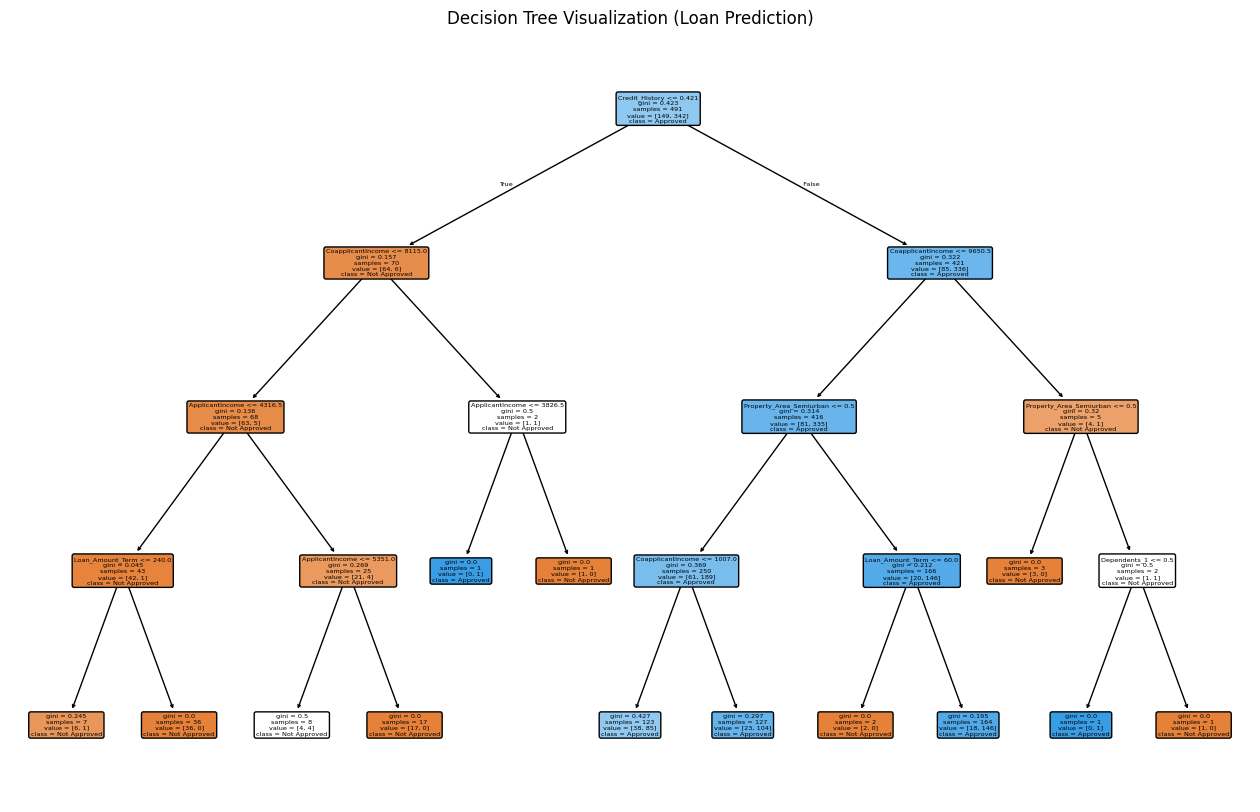

In [ ]:
plt.figure(figsize=(16,10))
plot_tree(clf,filled=True,feature_names=X.columns,class_names=["Not Approved","Approved"],rounded=True)
plt.title("Decision Tree Visualization (Loan Prediction)")
plt.show()

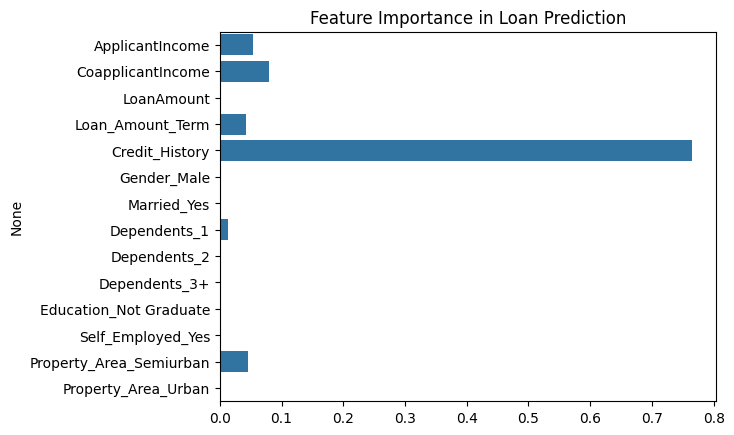

In [ ]:
#feature Importance
importance=clf.feature_importances_
sns.barplot(x=importance,y=X.columns)
plt.title("Feature Importance in Loan Prediction")
plt.show()

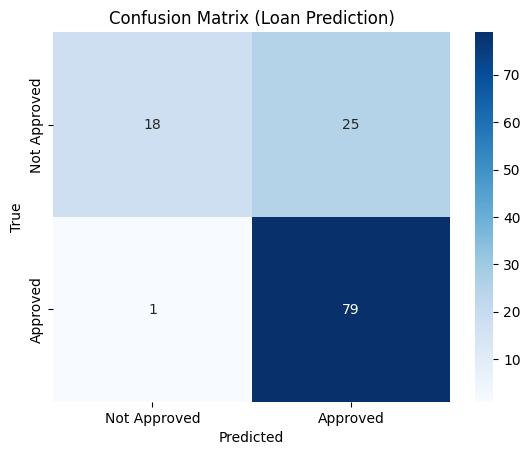

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved","Approved"], yticklabels=["Not Approved","Approved"])
plt.title("Confusion Matrix (Loan Prediction)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

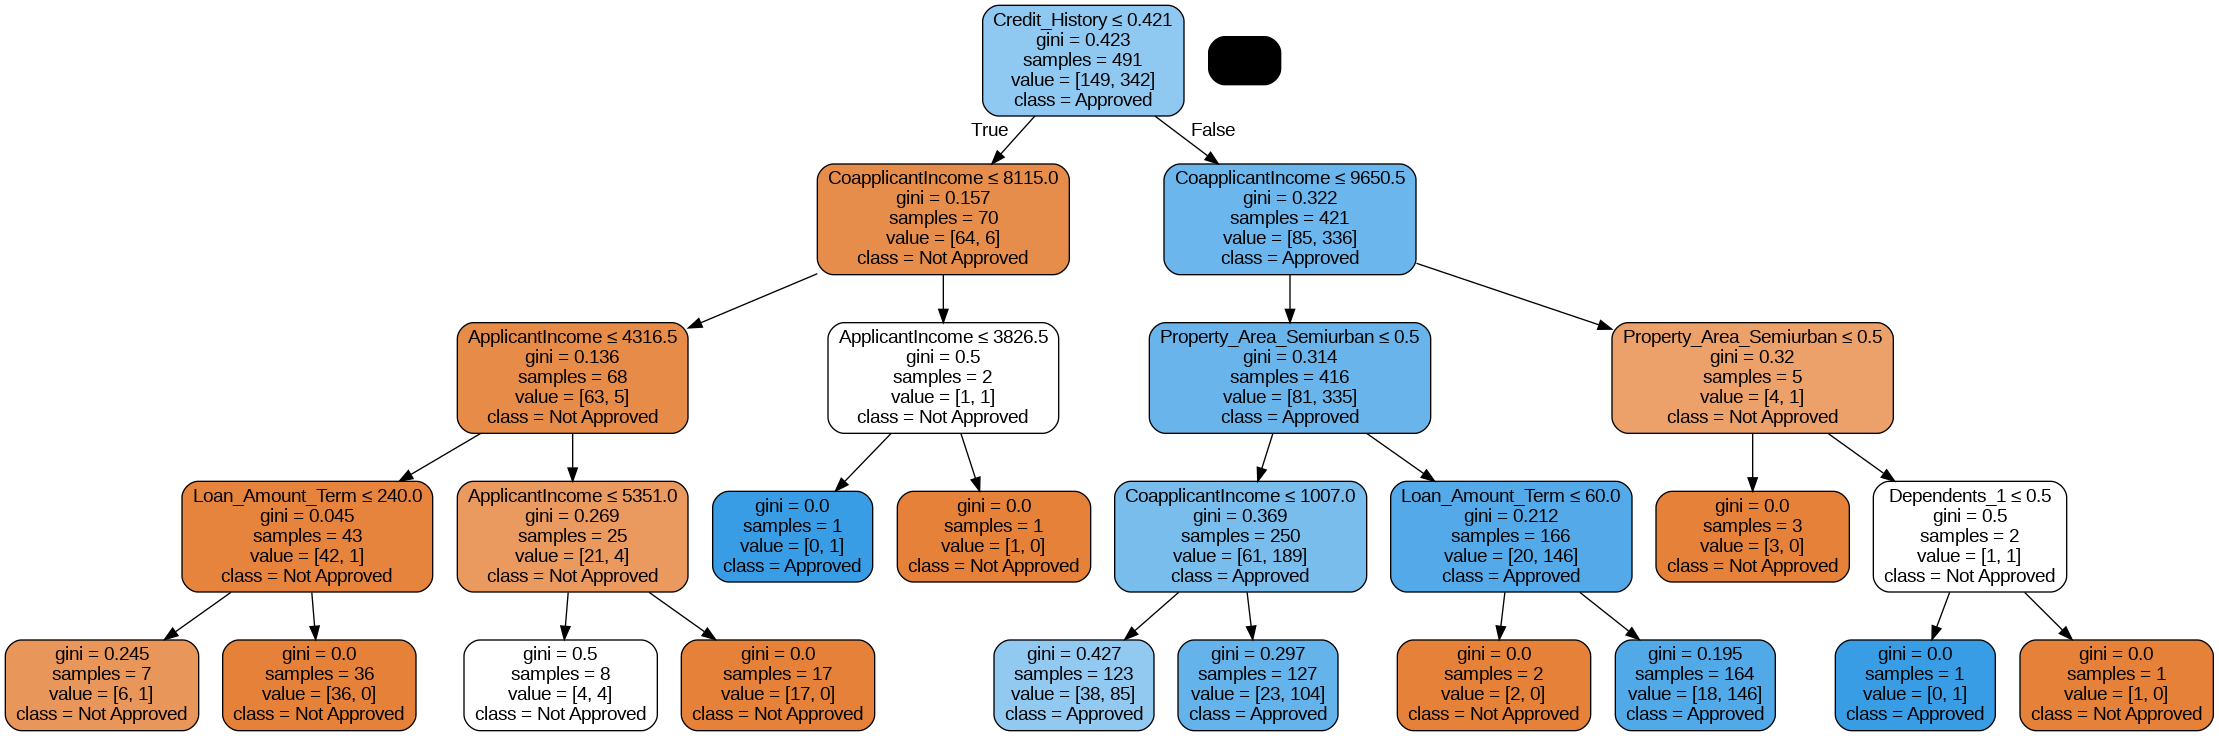

In [ ]:
# 4️⃣ Graphviz Tree Visualization
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=["Not Approved","Approved"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
